In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

# import tensorflow as tf
# from tensorflow.keras import datasets, layers, modles, Model, Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

mainDIR = os.listdir('./chest_xray')
print(mainDIR)

train_folder = './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test/'

#train
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

#Normal pic
print(len(os.listdir(train_n)))
rand_norm = np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ', norm_pic)
norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title: ', sic_pic)




ImportError: cannot import name 'modles' from 'tensorflow.keras' (/home/so/intro/.venv/lib/python3.10/site-packages/keras/_tf_keras/keras/__init__.py)

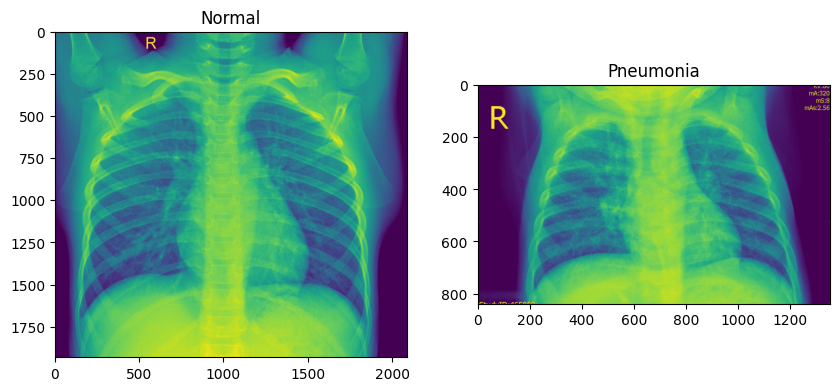

In [20]:
#Load the images

norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

f = plt.figure(figsize=(10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1,2,2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()




In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

model_in = Input(shape=(64,64,3))
model = Flatten()(model_in)

model = Dense(activation='relu', units = 128)(model)
model = Dense(activation='sigmoid', units = 1)(model)

model_fin = Model(inputs=model_in, outputs=model)
model_fin.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])



In [35]:
num_of_test_samples = 600
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('./chest_xray/train', target_size = (64,64), batch_size = 32, class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory('./chest_xray/val/', target_size = (64,64), batch_size = 32, class_mode = 'binary')
test_set= test_datagen.flow_from_directory('./chest_xray/test', target_size = (64,64), batch_size = 32, class_mode = 'binary')
model_fin.summary()


ann_model = model_fin.fit(training_set, steps_per_epoch=163, epochs=10, validation_data=validation_generator, validation_steps=624)

test_accu = model_fin.evaluate(test_set, steps=624)
model_fin.save('medical_ann.h5')
print('The testing accuracy is : ', test_accu[1]*100, '%')

Y_pred = model_fin.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
max(y_pred)



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,719,365 (18.00 MB)

 Trainable params: 1,573,121 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,146,244 (12.00 MB)

Epoch 1/10


/home/so/intro/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.8864 - loss: 0.2594 - val_accuracy: 0.8125 - val_loss: 0.4523
Epoch 2/10
  1/163 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.8438 - loss: 0.4284

/home/so/intro/.venv/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.8914 - loss: 0.2502 - val_accuracy: 0.8125 - val_loss: 0.4922
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.8955 - loss: 0.2438 - val_accuracy: 0.8125 - val_loss: 0.4718
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step - accuracy: 0.8984 - loss: 0.2541 - val_accuracy: 0.8125 - val_loss: 0.4768
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.9006 - loss: 0.2316 - val_accuracy: 0.8125 - val_loss: 0.5098
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.8956 - loss: 0.2341 - val_accuracy: 0.8125 - val_loss: 0.5188
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.8930 - loss: 0.2522 - val_accuracy: 0.7500 - val_loss: 0.6235
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.9026 - loss: 0.2312 - val_accuracy: 0.8750 - val_loss: 0.4480
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.8921 - loss: 0.2500 - val

The testing accuracy is :  83.17307829856873 %
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


np.int64(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/tmp/ipykernel_98117/3086364075.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  title = f"GT: {class_names[int(y_true[i])]} \nPred: {class_names[int(y_pred[i])]}"


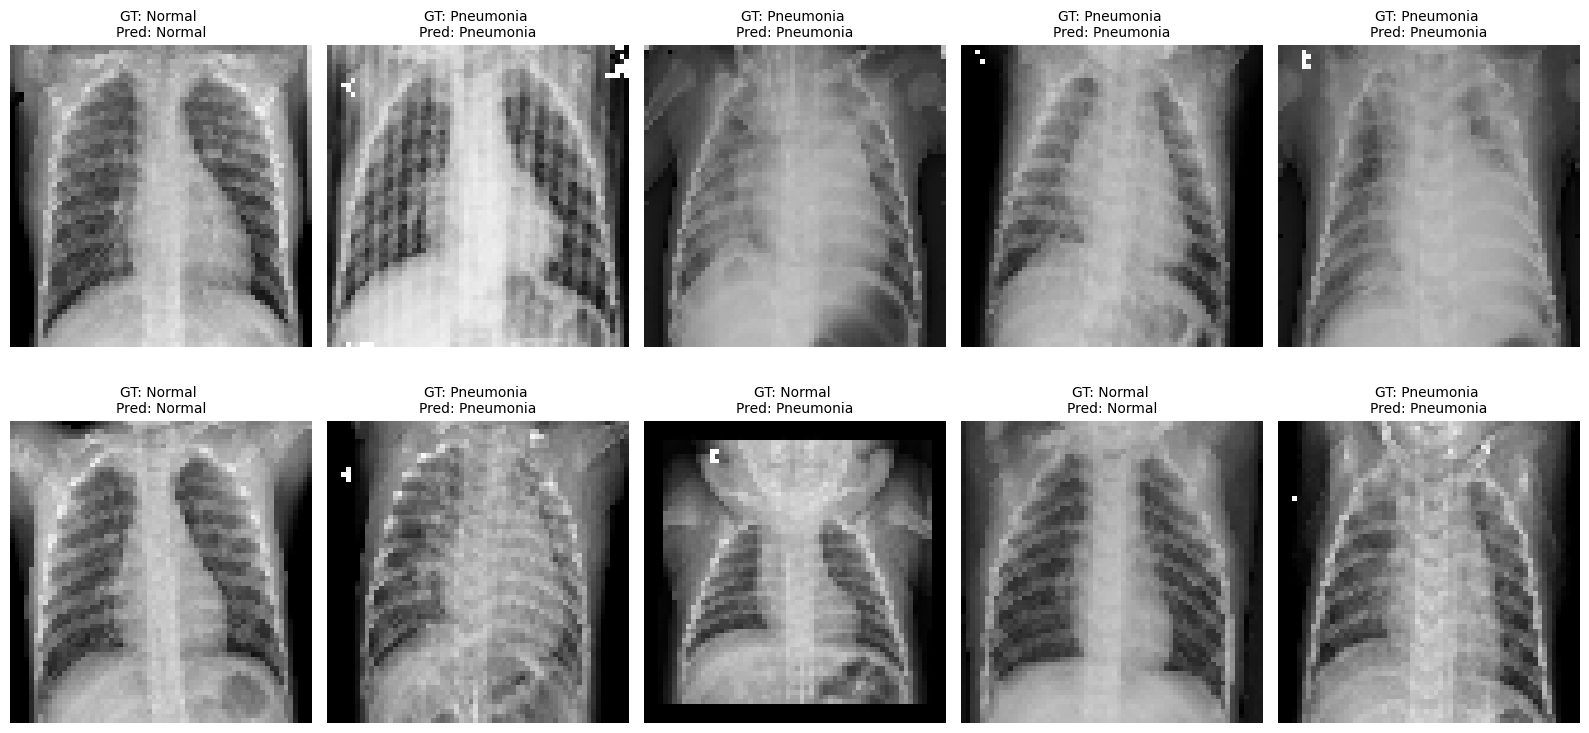

In [37]:
# 배치 하나 가져오기 (32장 기준)
x_test, y_true = next(test_set)

# 예측 (sigmoid 출력이므로 0.5 기준으로 binary 분류)
y_prob = model_fin.predict(x_test)
y_pred = (y_prob > 0.5).astype(int)

# 클래스 이름 매핑
class_names = ['Normal', 'Pneumonia']

# 이미지 출력
plt.figure(figsize=(16, 8))
for i in range(10):  # 앞의 10개 샘플만 출력
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.axis('off')
    title = f"GT: {class_names[int(y_true[i])]} \nPred: {class_names[int(y_pred[i])]}"
    plt.title(title, fontsize=10)
plt.tight_layout()
plt.show()
    

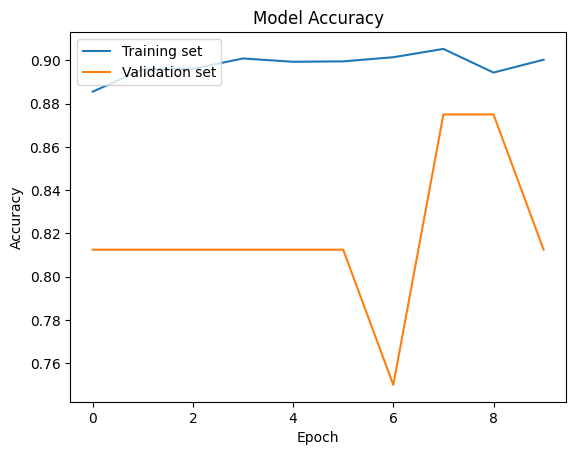

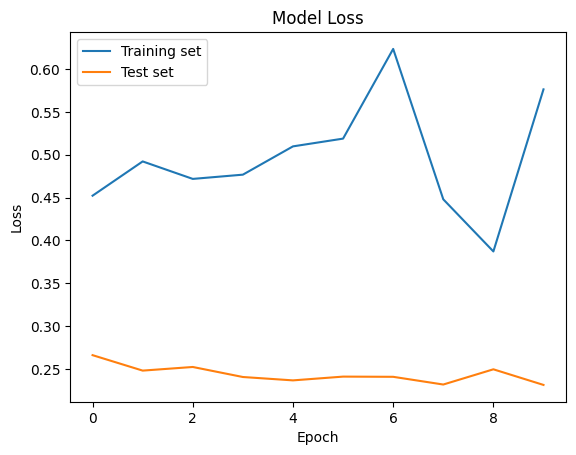

<Figure size 640x480 with 0 Axes>

In [39]:
#Accuracy
plt.plot(ann_model.history['accuracy'])
plt.plot(ann_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.savefig('train_accurcy.png')
plt.show(block=False)
plt.clf()

#Loss
plt.plot(ann_model.history['val_loss'])
plt.plot(ann_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.savefig('train_loss.png')
plt.show(block=False)
plt.clf()


